In [27]:
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_excel('./MSP_Projekt_2022-23_Zadani_St_8 (1).xlsx', sheet_name='Úkol 1')
df = df.dropna()
df2 = df.copy() 
#

# drop nan values


# merge columns of Praha and Brno

df2['Praha'] = df2['Praha'].astype(int)
df2['Brno'] = df2['Brno'].astype(int)
df2['Praha'] = df2['Praha'] + df2['Brno']
df2 = df2.drop(columns=['Brno'])
df2 = df2.rename(columns={'Praha': 'Vetsi_mesta'})

# merge columns of Znojmo Tišnov

df2['Znojmo'] = df2['Znojmo'].astype(int)
df2['Tišnov'] = df2['Tišnov'].astype(int)
df2['Znojmo'] = df2['Znojmo'] + df2['Tišnov']
df2 = df2.drop(columns=['Tišnov'])
df2 = df2.rename(columns={'Znojmo': 'Mala_mesta'})

# merge forth, fifth, sixth column

df2['Rokytnice nad Jizerou'] = df2['Rokytnice nad Jizerou'].astype(int)
df2['Jablunkov'] = df2['Jablunkov'].astype(int)
df2['Dolní Věstonice'] = df2['Dolní Věstonice'].astype(int)
df2['Rokytnice nad Jizerou'] = df2['Rokytnice nad Jizerou'] + df2['Jablunkov'] + df2['Dolní Věstonice']
df2 = df2.drop(columns=['Jablunkov', 'Dolní Věstonice'])
df2 = df2.rename(columns={'Rokytnice nad Jizerou': 'obce'})



df2


,Unnamed: 0,Vetsi_mesta,Mala_mesta,obce,okolí studenta
0,počet respondentů,2242,1268,675,20.0
1,zimní čas,834,559,300,4.0
2,letní čas,636,363,210,9.0
3,střídání časů,435,202,108,4.0
4,nemá názor,337,144,57,2.0


# BOD 1

## 1.a

H0 : zimny cas je rovnaky pre vsetky mesta
H1 : zimny cas je rozny pre vsetky mesta

In [28]:
# A - zimny, B - letny , C - striedanie casov

alpha = 0.05

m = 8
q = 1
k = m - q - 1

# sum of first row

sumForEveryRow = df.sum(axis=1,numeric_only=True)
print(sumForEveryRow)

# create variable for p1, p2 in cycle

# cycle trough list of sumForEveryRow

for i in range(1,4):
    p = sumForEveryRow[i]/ sumForEveryRow[0]
    print(p)
    values = df.iloc[0].values

    print(values)
    # create list of expected values for every column

    expectedValues = []
    for j in range(1,9):
        expectedValues.append(values[j] * p)
    print(expectedValues)


    T, p = stats.chisquare(f_obs = df.iloc[i].values[1:,], f_exp = expectedValues,ddof=1)

    print(T)
    print(p)
    print('H0 is rejected' if p < alpha else 'H0 is not rejected')


0    4205.0
1    1697.0
2    1218.0
3     749.0
4     540.0
dtype: float64
0.4035671819262782
['počet respondentů' 1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[535.5336504161712, 369.2639714625446, 274.8292508917955, 236.89393579072532, 114.61307966706302, 71.02782401902496, 86.76694411414982, 8.071343638525564]
22.720476798835556
0.0008957117744714648
H0 is rejected
0.2896551724137931
['počet respondentů' 1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[384.3724137931035, 265.0344827586207, 197.25517241379313, 170.02758620689656, 82.26206896551724, 50.97931034482759, 62.27586206896552, 5.793103448275863]
8.3529705718337
0.2133672661064076
H0 is not rejected
0.17812128418549347
['počet respondentů' 1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[236.36694411414985, 162.98097502972652, 121.30059453032105, 104.55719381688466, 50.58644470868015, 31.34934601664685, 38.2960760998811, 3.5624256837098693]
12.378916461699824
0.05403021733299772
H0 is not rejected


In [29]:
#D, E nova tabula bez okolia studenta , len 3 hodnoty

alpha = 0.05

m = 8
q = 1
k = m - q - 1

# sum of first row

sumForEveryRow = df2.sum(axis=1,numeric_only=True)
print(sumForEveryRow)

# create variable for p1, p2 in cycle

# cycle trough list of sumForEveryRow
x = [1,4] # zimny cas a nema nazor
for i in x:
    p = sumForEveryRow[i]/ sumForEveryRow[0]
    print(p)
    values = df.iloc[0].values

    print(values)
    # create list of expected values for every column

    expectedValues = []
    for j in range(1,9):
        expectedValues.append(values[j] * p)
    print(expectedValues)


    T, p = stats.chisquare(f_obs = df.iloc[i].values[1:,], f_exp = expectedValues,ddof=1)

    print(T)
    print(p)
    print('H0 is rejected' if p < alpha else 'H0 is not rejected')

0    4205.0
1    1697.0
2    1218.0
3     749.0
4     540.0
dtype: float64
0.4035671819262782
['počet respondentů' 1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[535.5336504161712, 369.2639714625446, 274.8292508917955, 236.89393579072532, 114.61307966706302, 71.02782401902496, 86.76694411414982, 8.071343638525564]
22.720476798835556
0.0008957117744714648
H0 is rejected
0.12841854934601665
['počet respondentů' 1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[170.4114149821641, 117.50297265160523, 87.45303210463734, 75.38168846611177, 36.47086801426873, 22.60166468489893, 27.60998810939358, 2.568370986920333]
39.78016680405891
5.031424182862881e-07
H0 is rejected


## F

In [30]:
# F pre rozdelenie 3 miest porovnanie s okolim studenta



dfF= df2.copy()
sumOfRespondents = dfF.iloc[0,4]
print(sumOfRespondents)
for j in range(1,4):
    for i in range(1,4):
        dfF.iloc[j,i] = dfF.iloc[j,i]*(sumOfRespondents/(dfF.iloc[1,1:4].sum()))

df2



20.0


,Unnamed: 0,Vetsi_mesta,Mala_mesta,obce,okolí studenta
0,počet respondentů,2242,1268,675,20.0
1,zimní čas,834,559,300,4.0
2,letní čas,636,363,210,9.0
3,střídání časů,435,202,108,4.0
4,nemá názor,337,144,57,2.0


In [31]:
dfF

,Unnamed: 0,Vetsi_mesta,Mala_mesta,obce,okolí studenta
0,počet respondentů,2242.000000,1268.000000,675.000000,20.0
1,zimní čas,9.852333,12.867549,18.591975,4.0
2,letní čas,307.901916,175.736471,101.665727,9.0
3,střídání časů,210.593292,97.792747,52.285231,4.0
4,nemá názor,337.000000,144.000000,57.000000,2.0


# 2

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

data = pd.read_excel('./MSP_Projekt_2022-23_Zadani_St_8 (1).xlsx', sheet_name='Úkol 2 - Data')
xi = np.array(pd.DataFrame(data, columns=['xi']))
yi = np.array(pd.DataFrame(data,columns=['yi']))
zi = np.array(pd.DataFrame(data,columns=['zi']))
alfa = 0.05
xi = xi.ravel()
yi = yi.ravel()
zi = zi.ravel()
#ANOVA
#polynomial model for full equarion
model = ols('zi ~ yi + I(yi**2) + xi + I(xi**2) + (xi*yi)',data = data).fit()
at = sm.stats.anova_lm(model,typ=2)
print(at)
print(model.summary())
# P > (t)
# test na nulovost pro koeficienty, xi, yi vypadaji podezřele hypotézu␣
#nezamítáme u nich
# dame je tedy pryč.

                   sum_sq    df         F    PR(>F)
yi            7055.714163   1.0  0.717120  0.400246
I(yi ** 2)   25369.316298   1.0  2.578454  0.113251
xi           10197.367669   1.0  1.036427  0.312487
I(xi ** 2)   32371.389818   1.0  3.290122  0.074386
xi:yi         8469.528042   1.0  0.860815  0.356997
Residual    629693.666965  64.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                     zi   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     17.64
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           6.00e-11
Time:                        08:46:07   Log-Likelihood:                -417.98
No. Observations:                  70   AIC:                             848.0
Df Residuals:                      64   BIC:                             861.5
Df M

In [33]:
# R-squared - best
# Intevral
#different anotaion for same thing like before
# odhad regresnich parametru je u koeficinetu posledni dva sloupce.
F = np.column_stack(( xi**2, yi**2, xi*yi))
F = sm.add_constant(F)
y = zi
model = sm.OLS(y, F).fit()
print(model.summary())
my_model = model
koefs = model.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           7.10e-12
Time:                        09:05:49   Log-Likelihood:                -419.38
No. Observations:                  70   AIC:                             846.8
Df Residuals:                      66   BIC:                             855.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4964     22.673     -1.521      0.1

In [34]:
F = np.column_stack((xi,yi, xi*yi))
F = sm.add_constant(F)
y = zi
model = sm.OLS(y, F).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.92
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           3.39e-11
Time:                        09:06:11   Log-Likelihood:                -421.05
No. Observations:                  70   AIC:                             850.1
Df Residuals:                      66   BIC:                             859.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7606     40.873      0.606      0.5

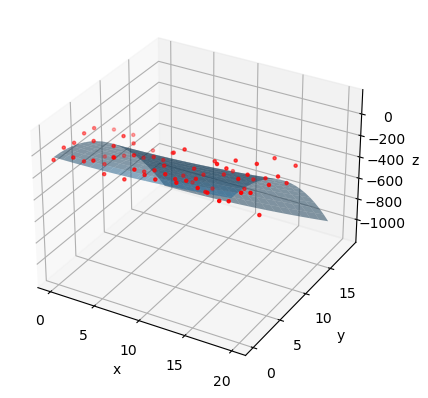

In [35]:
XY = np.vstack((xi, yi)).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(XY)
model = LinearRegression()
model.fit(X_poly, zi)
xs = np.tile(np.arange(20), (20,1))
ys = np.tile(np.arange(20), (20,1)).T
zs = xs**2*koefs[1]+ys**2*koefs[2]+xs*ys*koefs[3]+koefs[0]
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

In [36]:
 #c.)
print(my_model.mse_resid)
print(my_model.mse_total)

9928.18266145256
21702.99921244307


In [37]:
print('Constat: ',koefs[0]) #constant
print('xi**2: ',koefs[1]) # xi**2
print('yi**2: ',koefs[2]) # yi**2
print('xi*yi',koefs[3]) # xi*yi
h = 'x1 = 0 , x2 = 0'
F_test = my_model.f_test(h)
print('d.)')
print(F_test)
h2 = 'x1 = x2'
F_test2 = my_model.f_test(h2)
print('e.)')
print(F_test2)

Constat:  -34.49638797978392
xi**2:  0.26150097634820885
yi**2:  -3.0365491889573066
xi*yi 0.060351383275179096
d.)
<F test: F=36.09041598956841, p=2.5714161468137716e-11, df_denom=66, df_num=2>
e.)
<F test: F=45.983821679754485, p=3.961720422428355e-09, df_denom=66, df_num=1>
